In [2]:
from sklearn import model_selection,metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import numpy as np
import pandas as pd
import array
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('diabetes.csv')
df.head()

,Diabetes,HighBP,HighChol,BMI,Smoker,Stroke,Myocardial,PhysActivity,Fruit,Vegetables,...,NotAbleToAffordDoctor,GeneralHealth,MentalHealth,PhysicalHealth,HardToClimbStairs,BiologicalSex,AgeBracket,EducationBracket,IncomeBracket,Zodiac
0,0,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,1,9,4,3,10
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,1,7,6,1,11
2,0,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,1,9,4,8,2
3,0,1,0,27,0,0,0,1,1,1,...,0,2,0,0,0,1,11,3,6,11
4,0,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,1,11,5,4,8


In [6]:
df1 = df.copy()
df1['BMI']=(df['BMI']-df['BMI'].mean())/df['BMI'].std()
df1['MentalHealth']=(df['MentalHealth']-df['MentalHealth'].mean())/df['MentalHealth'].std()
df1['PhysicalHealth']=(df['PhysicalHealth']-df['PhysicalHealth'].mean())/df['PhysicalHealth'].std()
df1.head()

,Diabetes,HighBP,HighChol,BMI,Smoker,Stroke,Myocardial,PhysActivity,Fruit,Vegetables,...,NotAbleToAffordDoctor,GeneralHealth,MentalHealth,PhysicalHealth,HardToClimbStairs,BiologicalSex,AgeBracket,EducationBracket,IncomeBracket,Zodiac
0,0,1,1,1.757932,1,0,0,0,0,1,...,0,5,1.998588,1.233996,1,1,9,4,3,10
1,0,0,0,-0.511805,1,0,0,1,0,0,...,1,3,-0.429629,-0.486591,0,1,7,6,1,11
2,0,1,1,-0.057858,0,0,0,0,1,0,...,1,5,3.617399,2.954584,1,1,9,4,8,2
3,0,1,0,-0.209173,0,0,0,1,1,1,...,0,2,-0.429629,-0.486591,0,1,11,3,6,11
4,0,1,1,-0.663121,0,0,0,1,1,1,...,0,2,-0.024926,-0.486591,0,1,11,5,4,8


In [7]:
X=df1.loc[:,'HighBP':'Zodiac']
print(X.shape)
X.head()

(253680, 21)


,HighBP,HighChol,BMI,Smoker,Stroke,Myocardial,PhysActivity,Fruit,Vegetables,HeavyDrinker,...,NotAbleToAffordDoctor,GeneralHealth,MentalHealth,PhysicalHealth,HardToClimbStairs,BiologicalSex,AgeBracket,EducationBracket,IncomeBracket,Zodiac
0,1,1,1.757932,1,0,0,0,0,1,0,...,0,5,1.998588,1.233996,1,1,9,4,3,10
1,0,0,-0.511805,1,0,0,1,0,0,0,...,1,3,-0.429629,-0.486591,0,1,7,6,1,11
2,1,1,-0.057858,0,0,0,0,1,0,0,...,1,5,3.617399,2.954584,1,1,9,4,8,2
3,1,0,-0.209173,0,0,0,1,1,1,0,...,0,2,-0.429629,-0.486591,0,1,11,3,6,11
4,1,1,-0.663121,0,0,0,1,1,1,0,...,0,2,-0.024926,-0.486591,0,1,11,5,4,8


In [8]:
y=df1['Diabetes']
y.head()
print(y.shape)

(253680,)


In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.2)
print(X_test.shape)
print(y_test.shape)

(50736, 21)
(50736,)


Logistic Regression

In [103]:
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X_train, y_train)
AUROC = metrics.roc_auc_score(y_test, clf.decision_function(X_test))
print(AUROC)

0.8198905022868597


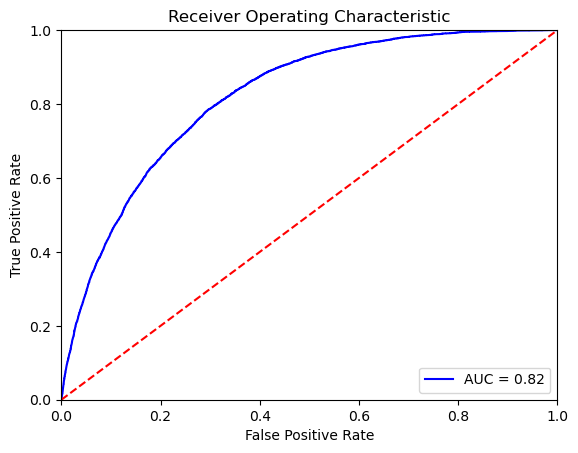

In [73]:
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [3]:
record=np.zeros(21)
print(record)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [71]:
i=0
for column_name in X.columns:
    X_train1=X_train.copy()
    X_test1=X_test.copy()
    X_train1.drop(labels=column_name,axis=1,inplace=True)
    X_test1.drop(labels=column_name,axis=1,inplace=True)
    clf = LogisticRegression(solver="liblinear", random_state=0).fit(X_train1, y_train)
    AUROC = metrics.roc_auc_score(y_test, clf.decision_function(X_test1))
    record[i]=AUROC
    i+=1
print(record)
min_index = np.argmin(record)
print(min_index)

[0.81387794 0.81413076 0.80450194 0.8199498  0.81977704 0.81942915
 0.81989464 0.81989176 0.81994773 0.818403   0.81985163 0.81998606
 0.80459257 0.81989383 0.81980776 0.81977312 0.81889282 0.81181737
 0.81995016 0.81936188 0.81995841]
2


SVM

In [10]:
svm = LinearSVC(C = 1, dual = False) 
svm.fit(X_train, y_train)
AUROC = metrics.roc_auc_score(y_test, svm.decision_function(X_test))
print(AUROC)

0.8213422943230673


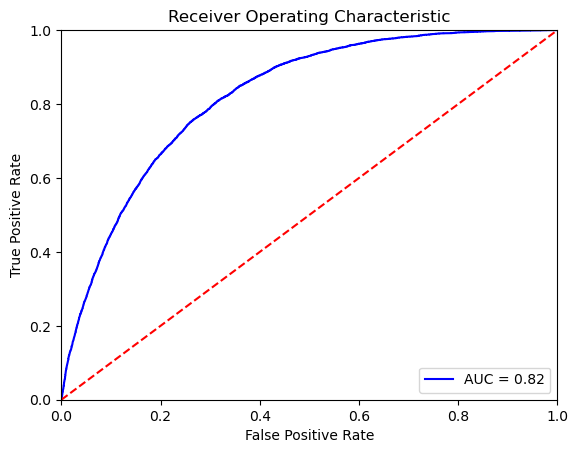

In [11]:
probs = svm.decision_function(X_test)
preds = probs[:]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [12]:
i=0
for column_name in X.columns:
    X_train1=X_train.copy()
    X_test1=X_test.copy()
    X_train1.drop(labels=column_name,axis=1,inplace=True)
    X_test1.drop(labels=column_name,axis=1,inplace=True)
    svm = LinearSVC(C = 1, dual = False) 
    svm.fit(X_train1, y_train)
    AUROC = metrics.roc_auc_score(y_test, svm.decision_function(X_test1))
    record[i]=AUROC
    i+=1
print(record)
min_index = np.argmin(record)
print(min_index)

[0.81415094 0.81564703 0.80458572 0.82148394 0.82120132 0.82043532
 0.82137665 0.82127914 0.82132736 0.8202346  0.82132429 0.82133486
 0.80785082 0.82129771 0.82126333 0.82116292 0.82035667 0.81327752
 0.82128383 0.82079775 0.82134969]
2


Single Tree

In [129]:
y_test.shape

(50736,)

In [130]:
clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X_train, y_train)
AUROC = metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print(AUROC)

0.5967340341892741


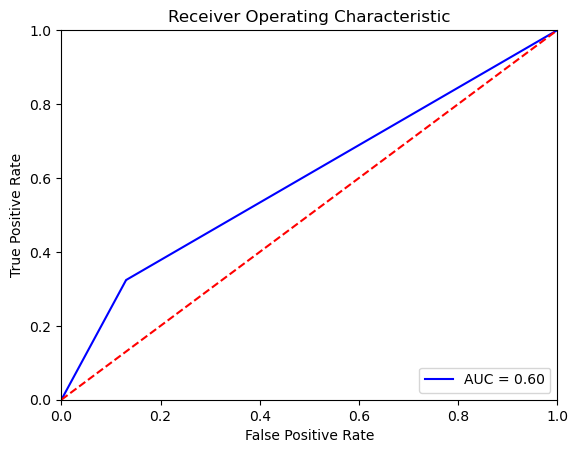

In [131]:
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [133]:
i=0
for column_name in X.columns:
    X_train1=X_train.copy()
    X_test1=X_test.copy()
    X_train1.drop(labels=column_name,axis=1,inplace=True)
    X_test1.drop(labels=column_name,axis=1,inplace=True)
    clf = tree.DecisionTreeClassifier(criterion='gini')
    clf = clf.fit(X_train1, y_train)
    AUROC = metrics.roc_auc_score(y_test, clf.predict_proba(X_test1)[:, 1])
    record[i]=AUROC
    i+=1
print(record)
min_index = np.argmin(record)
print(min_index)

[0.59411892 0.59570518 0.58255473 0.59718631 0.59686749 0.59342091
 0.59784632 0.59499585 0.59705775 0.59183748 0.59712657 0.59677158
 0.59532306 0.59338366 0.59556455 0.59669214 0.59575871 0.59157688
 0.59321171 0.59923894 0.59872363]
2


Random Forest

In [136]:
clf = RandomForestClassifier(n_estimators=1000, max_samples=0.1, max_features=0.5,bootstrap=True, criterion='gini')
clf.fit(X_train, y_train)
AUROC = metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print(AUROC)

0.8238527224589606


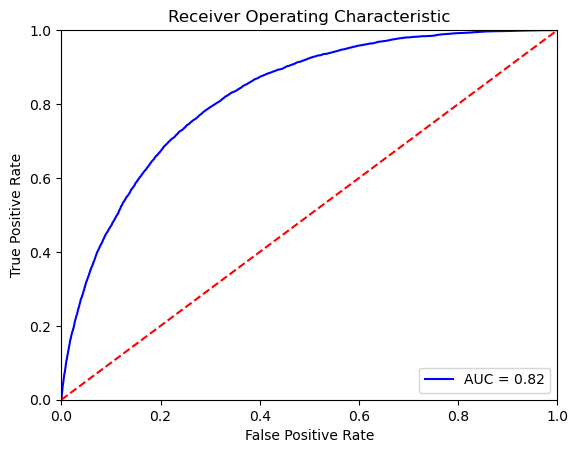

In [137]:
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [139]:
i=0
for column_name in X.columns:
    X_train1=X_train.copy()
    X_test1=X_test.copy()
    X_train1.drop(labels=column_name,axis=1,inplace=True)
    X_test1.drop(labels=column_name,axis=1,inplace=True)
    clf = RandomForestClassifier(n_estimators=100, max_samples=0.1, max_features=0.5,bootstrap=True, criterion='gini')
    clf.fit(X_train1, y_train)
    AUROC = metrics.roc_auc_score(y_test, clf.predict_proba(X_test1)[:, 1])
    record[i]=AUROC
    i+=1
print(record)
min_index = np.argmin(record)
print(min_index)

[0.81116309 0.81051862 0.79901006 0.81632089 0.81854596 0.81786446
 0.81777902 0.816788   0.81824656 0.81695383 0.81749224 0.81749708
 0.80088789 0.81846538 0.81694197 0.81753334 0.81692691 0.80743931
 0.81706024 0.81607519 0.81728528]
2


Adaboost

In [142]:
bdt = AdaBoostClassifier(
    tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=2000, learning_rate=1
)
bdt.fit(X_train, y_train)
AUROC = metrics.roc_auc_score(y_test, bdt.predict_proba(X_test)[:, 1])
print(AUROC)

0.8278938291322622


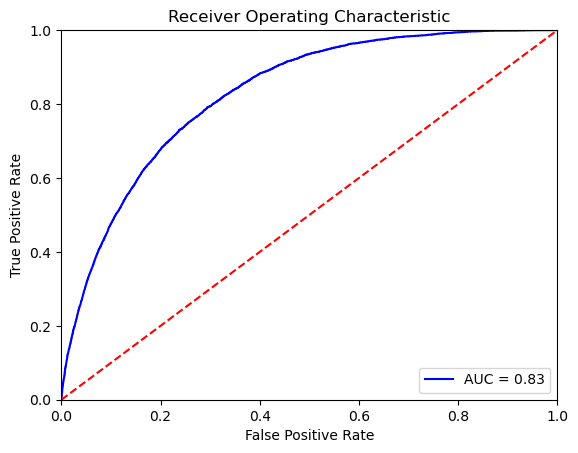

In [143]:
probs = bdt.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [145]:
i=0
for column_name in X.columns:
    X_train1=X_train.copy()
    X_test1=X_test.copy()
    X_train1.drop(labels=column_name,axis=1,inplace=True)
    X_test1.drop(labels=column_name,axis=1,inplace=True)
    bdt = AdaBoostClassifier(
    tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200, learning_rate=1
)
    bdt.fit(X_train1, y_train)
    AUROC = metrics.roc_auc_score(y_test, bdt.predict_proba(X_test1)[:, 1])
    record[i]=AUROC
    i+=1
print(record)
min_index = np.argmin(record)
print(min_index)

[0.81872044 0.82223955 0.81151376 0.82694858 0.82672791 0.82633074
 0.82694858 0.82694858 0.82694858 0.82568541 0.82694858 0.82694858
 0.81192853 0.82681122 0.82694858 0.82670827 0.82613082 0.82042525
 0.82668106 0.82628171 0.82694858]
2
